In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')

In [3]:
import pandas as pd

# Example: assuming data_train is your processed dataset
X = data_train.drop(columns=['label'])
y = data_train['label']

In [4]:

corr_with_label = X.corrwith(y).abs().sort_values(ascending=False)

print("Top correlated features with label:")
print(corr_with_label.head(10))

Top correlated features with label:
marital-status_married-civ-spouse    0.509334
relationship_husband                 0.450938
marital-status_never-married         0.385850
education-num                        0.373260
capitalgain                          0.310260
age-group                            0.293202
relationship_own-child               0.286117
hoursperweek                         0.276753
sex_male                             0.254890
sex_female                           0.254890
dtype: float64


In [5]:
threshold = 0.1
selected_features = corr_with_label[corr_with_label >= threshold].index.tolist()
X_selected = X[selected_features]
print(f"Selected {len(selected_features)} features based on correlation >= {threshold}")

Selected 24 features based on correlation >= 0.1


In [6]:
corr_matrix = X_selected.corr().abs()

# Create upper triangle mask
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Drop features with high inter-correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_final = X_selected.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} redundant features.")

Dropped 1 redundant features.


In [7]:
print(to_drop)

['sex_female']


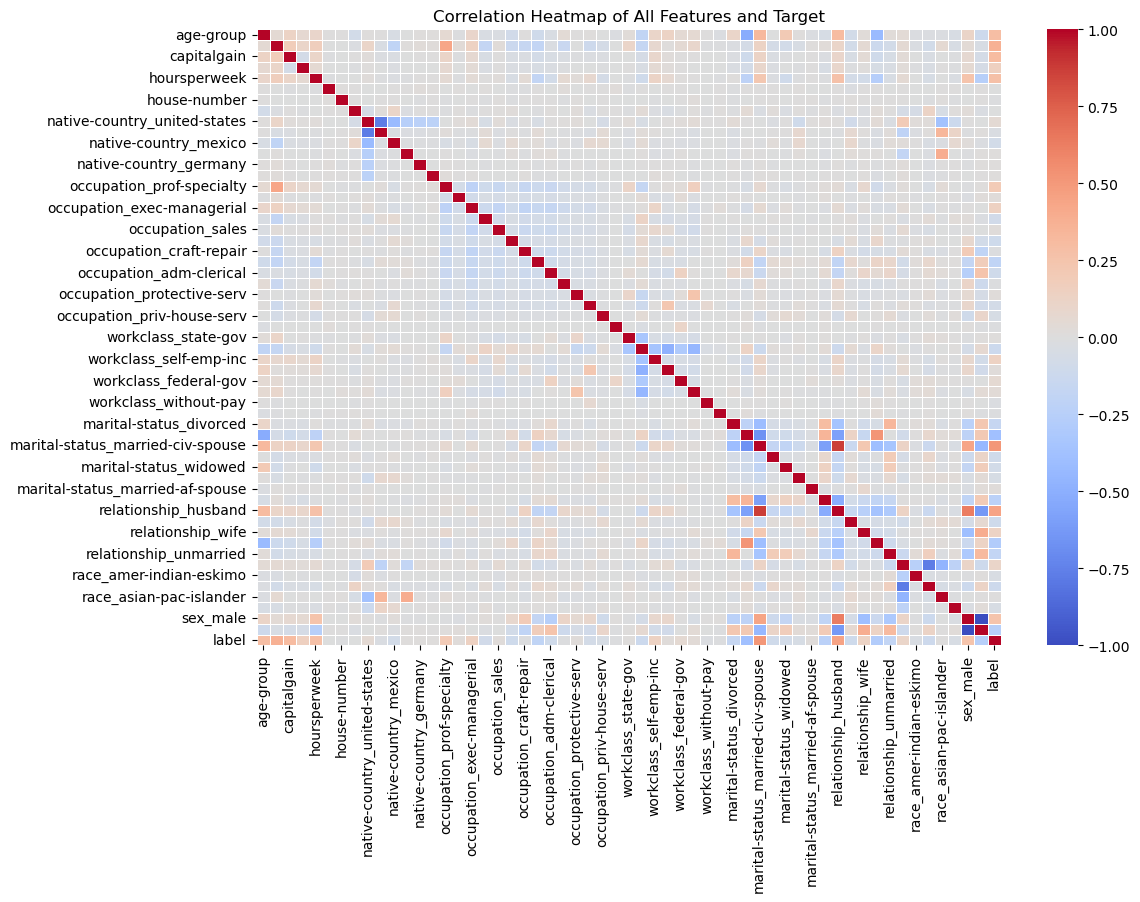

In [8]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì correlation matrix (‡πÄ‡∏â‡∏û‡∏≤‡∏∞ numeric features)
corr_matrix = data_train.corr(numeric_only=True)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=False,  # ‡πÑ‡∏°‡πà‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏ö‡∏ô heatmap
    cmap='coolwarm',
    center=0,
    linewidths=0.5,  # ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏ô‡∏≤‡∏Ç‡∏≠‡∏á‡πÄ‡∏™‡πâ‡∏ô‡πÅ‡∏ö‡πà‡∏á
    linecolor='white'  # ‡∏™‡∏µ‡∏Ç‡∏≠‡∏á‡πÄ‡∏™‡πâ‡∏ô‡πÅ‡∏ö‡πà‡∏á
)
plt.title("Correlation Heatmap of All Features and Target")
plt.show()

In [9]:
print(selected_features)

['marital-status_married-civ-spouse', 'relationship_husband', 'marital-status_never-married', 'education-num', 'capitalgain', 'age-group', 'relationship_own-child', 'hoursperweek', 'sex_male', 'sex_female', 'relationship_not-in-family', 'occupation_prof-specialty', 'occupation_other-service', 'relationship_unmarried', 'marital-status_divorced', 'capitalloss', 'occupation_exec-managerial', 'workclass_self-emp-inc', 'relationship_wife', 'workclass_private', 'race_black', 'race_white', 'relationship_other-relative', 'occupation_handlers-cleaners']


In [10]:
data_train

age-group  education-num  capitalgain  capitalloss  hoursperweek  \
id                                                                        
26890        3.0           16.0          0.0          0.0           3.0   
933          3.0           14.0          4.0          0.0           3.0   
25596        2.0           10.0          0.0          0.0           2.0   
12949        2.0           13.0          0.0          0.0           3.0   
6681         1.0            9.0          0.0          0.0           2.0   
...          ...            ...          ...          ...           ...   
8695         0.0           10.0          0.0          0.0           2.0   
2192         2.0           10.0          2.0          0.0           2.0   
8250         0.0            9.0          0.0          0.0           2.0   
18511        2.0           14.0          0.0          0.0           0.0   
16074        2.0            8.0          0.0          0.0           3.0   

       social-security-number  house-number    fnlwgt  \
id                                                      
26890                1.672646      0.010780  1.326909   
933                  1.276105      0.487078 -0.863204   
25596               -0.596153      1.417561  2.005484   
12949                0.106478     -1.622392  4.735296   
6681                 1.090917     -1.139074  0.453120   
...                       ...           ...       ...   
8695                -1.425545     -1.640643 -1.410660   
2192                 0.938057     -1.433908 -0.824585   
8250                 0.269947      1.282429  1.214576   
18511               -0.823025      0.071151  2.806192   
16074                0.403626      1.302085 -1.100031   

       native-country_united-states  native-country_Other  ...  \
id                                                         ...   
26890                           1.0                   0.0  ...   
933                             1.0                   0.0  ...   
25596                           1.0                   0.0  ...   
12949                           1.0                   0.0  ...   
6681                            1.0                   0.0  ...   
...                             ...                   ...  ...   
8695                            1.0                   0.0  ...   
2192                            1.0                   0.0  ...   
8250                            1.0                   0.0  ...   
18511                           1.0                   0.0  ...   
16074                           0.0                   1.0  ...   

       relationship_own-child  relationship_unmarried  race_white  \
id                                                                  
26890                     1.0                     0.0         1.0   
933                       0.0                     1.0         1.0   
25596                     0.0                     1.0         1.0   
12949                     0.0                     0.0         1.0   
6681                      0.0                     0.0         1.0   
...                       ...                     ...         ...   
8695                      0.0                     0.0         1.0   
2192                      0.0                     0.0         1.0   
8250                      0.0                     0.0         0.0   
18511                     0.0                     0.0         1.0   
16074                     0.0                     0.0         0.0   

       race_amer-indian-eskimo  race_black  race_asian-pac-islander  \
id                                                                    
26890                      0.0         0.0                      0.0   
933                        0.0         0.0                      0.0   
25596                      0.0         0.0                      0.0   
12949                      0.0         0.0                      0.0   
6681                       0.0         0.0                      0.0   
...                        ...     

In [11]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Load Your Data (You already did this) ---
datatrain_df = data_train
test_df = data_test

# --- 2. Separate Features (X) and Target (y) ---
# --- IMPORTANT: Change 'target' to your actual target column name! ---
target_column = 'label' # Or 'salary', 'income', etc.

X_train = datatrain_df.drop(target_column, axis=1)
y_train = datatrain_df[target_column]

X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

# --- 3. CRITICAL STEP: Feature Scaling ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Initialize and Train the MLP/DNN ---
print("Training the MLP Classifier...")

# This creates a network with 2 hidden layers: one with 64 neurons, one with 32
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # The architecture of your network
    max_iter=1000,               # Max epochs (passes through data)
    early_stopping=True,         # Stops training when validation score stops improving
    random_state=42,             # For reproducible results
    verbose=True                 # Set to True to see training progress
)

# Train the model on the SCALED data
mlp_model.fit(X_train_scaled, y_train)

print("Training complete.")

# --- 5. Evaluate the Model ---
# Make predictions on the SCALED test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Print the results
print(f"\nMLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, digits=4))

Training the MLP Classifier...
Iteration 1, loss = 0.49133620
Validation score: 0.809809
Iteration 2, loss = 0.39553445
Validation score: 0.816388
Iteration 3, loss = 0.38761108
Validation score: 0.815191
Iteration 4, loss = 0.38397011
Validation score: 0.817584
Iteration 5, loss = 0.38150600
Validation score: 0.816986
Iteration 6, loss = 0.37992177
Validation score: 0.812201
Iteration 7, loss = 0.37747109
Validation score: 0.815789
Iteration 8, loss = 0.37623667
Validation score: 0.815789
Iteration 9, loss = 0.37470271
Validation score: 0.815191
Iteration 10, loss = 0.37343532
Validation score: 0.813995
Iteration 11, loss = 0.37228128
Validation score: 0.816388
Iteration 12, loss = 0.37115683
Validation score: 0.817584
Iteration 13, loss = 0.36988906
Validation score: 0.817584
Iteration 14, loss = 0.36885569
Validation score: 0.818780
Iteration 15, loss = 0.36815338
Validation score: 0.816388
Iteration 16, loss = 0.36700670
Validation score: 0.821770
Iteration 17, loss = 0.36691766
Va

In [14]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import optuna
import time

# --- 1. Load Your Data (from existing variables) ---
datatrain_df = data_train
test_df = data_test

# --- 2. Separate Features (X) and Target (y) ---
target_column = 'label' # This is your target column

X_train = datatrain_df.drop(target_column, axis=1)
y_train = datatrain_df[target_column]

X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

# --- 3. CRITICAL STEP: Feature Scaling ---
print("Scaling features...")
scaler = StandardScaler()
# Fit ONLY on training data
scaler.fit(X_train)
# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete.")

# --- 4. Create a persistent Train/Validation split for Optuna ---
# We split the *main training set* into a smaller training set and a
# validation set. This validation set will be used to score each Optuna trial.
# We use 'stratify' to ensure both sets have a similar class distribution.
X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
    X_train_scaled, 
    y_train, 
    test_size=0.2,  # Use 20% of training data for validation during tuning
    random_state=42, 
    stratify=y_train
)

# --- 5. Define the Optuna Objective Function ---
def objective(trial):
    """
    This function defines the search space for Optuna and returns
    the score (F1) for a given set of hyperparameters.
    """
    
    # --- Tune Network Architecture ---
    n_layers = trial.suggest_int('n_layers', 1, 3) # 1, 2, or 3 hidden layers
    
    layers = []
    for i in range(n_layers):
        # Suggest a number of neurons for each layer (between 32 and 256)
        layers.append(trial.suggest_int(f'n_units_l{i+1}', 32, 256))
    
    hidden_layer_sizes = tuple(layers)
    
    # --- Tune Hyperparameters ---
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True) # L2 regularization
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log=True)

    # --- Create the Model ---
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        solver='adam',          # Adam is a good default
        max_iter=1000,          # Set high, early_stopping will handle it
        early_stopping=True,    # Use early stopping to prevent overfitting
        random_state=42,
        verbose=False           # Silence the training logs for trials
    )
    
    # --- Train the Model (on the smaller 'opt' training set) ---
    # The model will internally split off a fraction of 'X_train_opt' for
    # its own 'early_stopping' validation.
    model.fit(X_train_opt, y_train_opt)
    
    # --- Evaluate the Model (on the held-out 'opt' validation set) ---
    y_pred = model.predict(X_val_opt)
    
    # We optimize for 'macro' F1-score, which is good for imbalanced classes
    score = f1_score(y_val_opt, y_pred, average='macro')
    
    return score

# --- 6. Run the Optuna Study ---
print("\nStarting Optuna hyperparameter search...")
start_time = time.time()

# We want to MAXIMIZE the F1 score
study = optuna.create_study(direction='maximize', study_name='mlp_tuning')
study.optimize(
    objective, 
    n_trials=30,  # Number of trials. Increase for better results, but it takes longer.
    show_progress_bar=True
)

end_time = time.time()
print(f"Optuna search complete. Time taken: {end_time - start_time:.2f} seconds")

# --- 7. Get Best Params and Train Final Model ---
print("\n--- Best Trial Results ---")
print(f"Best Macro F1 Score (on validation set): {study.best_value:.6f}")

# --- Here is the variable you requested ---
best_params = study.best_params
print("Best Parameters:")
print(best_params)

# --- Process params for the final model ---
# We need to manually reconstruct the 'hidden_layer_sizes' tuple
# from the 'best_params' dictionary.
params_for_model = best_params.copy()
n_layers = params_for_model.pop('n_layers')
final_layers = []
for i in range(n_layers):
    key = f'n_units_l{i+1}'
    final_layers.append(params_for_model.pop(key))

final_hidden_layers = tuple(final_layers)

# --- Create and Train the Final Model ---
print("\nTraining the FINAL optimized model on *all* scaled training data...")
# We use the remaining params (activation, alpha, etc.) directly
final_model = MLPClassifier(
    hidden_layer_sizes=final_hidden_layers,
    **params_for_model,  # This passes activation, alpha, learning_rate_init
    solver='adam',
    max_iter=1000,        # Use a high number of epochs
    early_stopping=True,  # Early stopping on the full training data
    random_state=42,
    verbose=True          # Show the training progress for the final model
)

# Train on the FULL scaled training set
final_model.fit(X_train_scaled, y_train)
print("Final model training complete.")

# --- 8. Final Evaluation on the Test Set ---
print("\n--- Final Model Evaluation on TEST Data ---")

# Make predictions on the SCALED test data
y_pred_final = final_model.predict(X_test_scaled)

# Print the results
print(f"\nFinal Tuned MLP Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print("\nFinal Tuned MLP Classification Report:")
print(classification_report(y_test, y_pred_final, digits=4))

[I 2025-10-22 17:16:43,273] A new study created in memory with name: mlp_tuning


Scaling features...
Scaling complete.

Starting Optuna hyperparameter search...


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-10-22 17:16:54,347] Trial 0 finished with value: 0.8116160069458507 and parameters: {'n_layers': 1, 'n_units_l1': 126, 'activation': 'tanh', 'alpha': 0.0005988041847311556, 'learning_rate_init': 0.009687421053580536}. Best is trial 0 with value: 0.8116160069458507.
[I 2025-10-22 17:17:02,300] Trial 1 finished with value: 0.8133294026476671 and parameters: {'n_layers': 2, 'n_units_l1': 40, 'n_units_l2': 57, 'activation': 'tanh', 'alpha': 2.784672165734249e-05, 'learning_rate_init': 0.000855865861132675}. Best is trial 1 with value: 0.8133294026476671.
[I 2025-10-22 17:17:10,096] Trial 2 finished with value: 0.8028739288143611 and parameters: {'n_layers': 1, 'n_units_l1': 158, 'activation': 'tanh', 'alpha': 0.00015859948203663952, 'learning_rate_init': 0.00012183806097455662}. Best is trial 1 with value: 0.8133294026476671.
[I 2025-10-22 17:17:20,281] Trial 3 finished with value: 0.8099261443229407 and parameters: {'n_layers': 3, 'n_units_l1': 56, 'n_units_l2': 61, 'n_units_l3': 

In [16]:
best_params

{'n_layers': 3,
 'n_units_l1': 226,
 'n_units_l2': 112,
 'n_units_l3': 185,
 'activation': 'relu',
 'alpha': 0.09988973301090445,
 'learning_rate_init': 0.0003520144637184677}

### Class weight

In [17]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE  # üëà 1. Import SMOTE

# --- 1. Load Your Data (You already did this) ---
datatrain_df = data_train
test_df = data_test

# --- 2. Separate Features (X) and Target (y) ---
target_column = 'label' 

X_train = datatrain_df.drop(target_column, axis=1)
y_train = datatrain_df[target_column]

X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

# --- 3. CRITICAL STEP: Feature Scaling ---
print("Scaling features...")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete.")

# --- 3.5: Apply SMOTE to the SCALED Training Data --- üëà (NEW STEP)
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
# We resample the *scaled* training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training shape: {X_train_scaled.shape}")
print(f"New resampled training shape: {X_train_resampled.shape}")
print(f"New resampled label distribution:\n{pd.Series(y_train_resampled).value_counts()}")


# --- 4. Define Best Params & Initialize the MLP/DNN ---

# Using the 'best_params' variable you already defined.
print(f"\nUsing pre-defined best_params: {best_params}")

# Process the parameters for the model
params_for_model = best_params.copy() 

n_layers = params_for_model.pop('n_layers') 
final_layers = []
for i in range(n_layers):
    key = f'n_units_l{i+1}' 
    final_layers.append(params_for_model.pop(key))

final_hidden_layers = tuple(final_layers) 

print(f"Training the MLP Classifier with tuned parameters on SMOTEd data...")
print(f"Architecture: {final_hidden_layers}")

# Initialize the model with the tuned parameters
mlp_model = MLPClassifier(
    hidden_layer_sizes=final_hidden_layers,  # The tuned architecture
    **params_for_model,                      # Passes 'activation', 'alpha', 'learning_rate_init'
    
    # --- Static parameters ---
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=False  
)

# üëà 5. Train the model on the NEW RESAMPLED data
#    (No 'sample_weight' argument is used)
mlp_model.fit(X_train_resampled, y_train_resampled)

print("Training complete.")

# --- 6. Evaluate the Model ---
# We evaluate on the original, *un-resampled*, scaled test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

print(f"\nMLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, digits=4))

Scaling features...
Scaling complete.

Applying SMOTE to the training data...


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Original training shape: (16720, 23)
New resampled training shape: (19438, 23)
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Using pre-defined best_params: {'n_layers': 3, 'n_units_l1': 226, 'n_units_l2': 112, 'n_units_l3': 185, 'activation': 'relu', 'alpha': 0.09988973301090445, 'learning_rate_init': 0.0003520144637184677}
Training the MLP Classifier with tuned parameters on SMOTEd data...
Architecture: (226, 112, 185)
Training complete.

MLP Accuracy: 0.8084

MLP Classification Report:
              precision    recall  f1-score   support

         0.0     0.9056    0.7463    0.8182      2416
         1.0     0.7200    0.8934    0.7974      1764

    accuracy                         0.8084      4180
   macro avg     0.8128    0.8198    0.8078      4180
weighted avg     0.8272    0.8084    0.8094      4180



In [22]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [25]:
import pandas
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

print("\n--- 2. Testing MLPClassifier with SMOTE ---")

# --- Load Data ---
try:
    data_train_full = data_train
    data_test_mlp = data_test
except NameError: # Changed to NameError since data is in memory
    print("Error: data_train or data_test not found in memory.")
    # exit() 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']
X_test = data_test_mlp.drop(['label'], axis='columns')
y_test = data_test_mlp['label']

# --- Apply SMOTE ---
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y_full)
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 1. Process Parameters (The fix is here) ---
print(f"Using pre-defined best_params: {best_params}")
params_for_model = best_params.copy()

# Pop the architecture keys from the dict
n_layers = params_for_model.pop('n_layers') 
final_layers = []
for i in range(n_layers):
    key = f'n_units_l{i+1}' 
    final_layers.append(params_for_model.pop(key))

# This is the tuple the model needs
final_hidden_layers = tuple(final_layers) 
# 'params_for_model' now just has {'activation': ..., 'alpha': ..., etc.}
print(f"Translated architecture: {final_hidden_layers}")


# --- 2. Create and Train Pipeline (Now with correct args) ---
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Scale
    ('model', MLPClassifier(
        # Pass the processed arguments
        hidden_layer_sizes=final_hidden_layers,  # üëà The tuple
        **params_for_model,                      # üëà The remaining params
        
        # Static params
        random_state=42,
        max_iter=1000,
        early_stopping=True # Good idea to keep this
    ))
])

print("\nTraining model on SMOTEd data...")
pipeline.fit(X_resampled, y_resampled) # Train on SMOTEd data
print("Model training complete.")

# --- Evaluate ---
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, digits=6, output_dict=True)
df_report = pandas.DataFrame(report).transpose()

print("\nMLPClassifier (Tuned + SMOTE) Report:")
print(df_report)


--- 2. Testing MLPClassifier with SMOTE ---
Applying SMOTE...
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64
Using pre-defined best_params: {'n_layers': 3, 'n_units_l1': 226, 'n_units_l2': 112, 'n_units_l3': 185, 'activation': 'relu', 'alpha': 0.09988973301090445, 'learning_rate_init': 0.0003520144637184677}
Translated architecture: (226, 112, 185)

Training model on SMOTEd data...
Model training complete.

MLPClassifier (Tuned + SMOTE) Report:
              precision    recall  f1-score      support
0.0            0.909778  0.747103  0.820455  2416.000000
1.0            0.721767  0.898526  0.800505  1764.000000
accuracy       0.811005  0.811005  0.811005     0.811005
macro avg      0.815773  0.822814  0.810480  4180.000000
weighted avg   0.830436  0.811005  0.812036  4180.000000


In [26]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [27]:
import pandas
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek  # üëà 1. Import from imblearn.combine

print("\n--- 3. Testing MLPClassifier with SMOTETomek ---") # üëà Updated title

# --- Load Data ---
try:
    data_train_full = data_train
    data_test_mlp = data_test
except NameError: 
    print("Error: data_train or data_test not found in memory.")
    # exit() 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']
X_test = data_test_mlp.drop(['label'], axis='columns')
y_test = data_test_mlp['label']

# --- Apply SMOTETomek --- üëà 2. This section is updated
print("Applying SMOTETomek...")
# SMOTETomek *does* support n_jobs
smt = SMOTETomek(random_state=42, n_jobs=-1) 
X_resampled, y_resampled = smt.fit_resample(X_full, y_full)
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 1. Process Parameters (This part is the same) ---
# print(f"Using pre-defined best_params: {best_params}")
params_for_model = best_params.copy()

n_layers = params_for_model.pop('n_layers') 
final_layers = []
for i in range(n_layers):
    key = f'n_units_l{i+1}' 
    final_layers.append(params_for_model.pop(key))

final_hidden_layers = tuple(final_layers) 
# print(f"Translated architecture: {final_hidden_layers}")


# --- 2. Create and Train Pipeline (This part is the same) ---
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', MLPClassifier(
        hidden_layer_sizes=final_hidden_layers,
        **params_for_model,                      
        random_state=42,
        max_iter=1000,
        early_stopping=True
    ))
])

print("\nTraining model on SMOTETomek data...")
pipeline.fit(X_resampled, y_resampled) # Train on resampled data
print("Model training complete.")

# --- Evaluate ---
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, digits=6, output_dict=True)
df_report = pandas.DataFrame(report).transpose()

print("\nMLPClassifier (Tuned + SMOTETomek) Report:") # üëà Updated title
print(df_report)


--- 3. Testing MLPClassifier with SMOTETomek ---
Applying SMOTETomek...
New resampled label distribution:
label
1.0    9674
0.0    9674
Name: count, dtype: int64

Training model on SMOTETomek data...
Model training complete.

MLPClassifier (Tuned + SMOTETomek) Report:
              precision    recall  f1-score      support
0.0            0.875395  0.802566  0.837400  2416.000000
1.0            0.757252  0.843537  0.798069  1764.000000
accuracy       0.819856  0.819856  0.819856     0.819856
macro avg      0.816323  0.823052  0.817735  4180.000000
weighted avg   0.825538  0.819856  0.820802  4180.000000


In [28]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [29]:
import pandas
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN  # üëà 1. Import from imblearn.over_sampling

print("\n--- 4. Testing MLPClassifier with ADASYN ---") # üëà Updated title

# --- Load Data ---
try:
    data_train_full = data_train
    data_test_mlp = data_test
except NameError: 
    print("Error: data_train or data_test not found in memory.")
    # exit() 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']
X_test = data_test_mlp.drop(['label'], axis='columns')
y_test = data_test_mlp['label']

# --- Apply ADASYN --- üëà 2. This section is updated
print("Applying ADASYN...")
# ADASYN does NOT support n_jobs
ada = ADASYN(random_state=42) 
X_resampled, y_resampled = ada.fit_resample(X_full, y_full)
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 1. Process Parameters (This part is the same) ---
# print(f"Using pre-defined best_params: {best_params}")
params_for_model = best_params.copy()

n_layers = params_for_model.pop('n_layers') 
final_layers = []
for i in range(n_layers):
    key = f'n_units_l{i+1}' 
    final_layers.append(params_for_model.pop(key))

final_hidden_layers = tuple(final_layers) 
# print(f"Translated architecture: {final_hidden_layers}")


# --- 2. Create and Train Pipeline (This part is the same) ---
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', MLPClassifier(
        hidden_layer_sizes=final_hidden_layers,
        **params_for_model,                      
        random_state=42,
        max_iter=1000,
        early_stopping=True
    ))
])

print("\nTraining model on ADASYN data...")
pipeline.fit(X_resampled, y_resampled) # Train on resampled data
print("Model training complete.")

# --- Evaluate ---
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, digits=6, output_dict=True)
df_report = pandas.DataFrame(report).transpose()

print("\nMLPClassifier (Tuned + ADASYN) Report:") # üëà Updated title
print(df_report)


--- 4. Testing MLPClassifier with ADASYN ---
Applying ADASYN...
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Training model on ADASYN data...
Model training complete.

MLPClassifier (Tuned + ADASYN) Report:
              precision    recall  f1-score      support
0.0            0.912237  0.752897  0.824943  2416.000000
1.0            0.726898  0.900794  0.804557  1764.000000
accuracy       0.815311  0.815311  0.815311     0.815311
macro avg      0.819568  0.826846  0.814750  4180.000000
weighted avg   0.834022  0.815311  0.816340  4180.000000


In [1]:
import pandas as pd
import numpy as np
import optuna

# -----------------------------------------------
# 1. ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ï‡∏±‡∏ß Import
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler # ‚ùóÔ∏è ‡∏ï‡πâ‡∏≠‡∏á‡πÉ‡∏ä‡πâ Scaler
from imblearn.over_sampling import SMOTE # ‚ùóÔ∏è ‡πÉ‡∏ä‡πâ SMOTE (‡πÄ‡∏£‡πá‡∏ß‡∏Å‡∏ß‡πà‡∏≤ SMOTETomek)
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# -----------------------------------------------
# 2. ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏ä‡∏∑‡πà‡∏≠ Script
print("--- üöÄ Starting Optuna Hyperparameter Search for MLPClassifier ---")
# -----------------------------------------------


# --- 1. ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• --- (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
try:
    train_df = pd.read_csv("../data/salary.train.processed.csv")
    test_df = pd.read_csv("../data/salary.test.processed.csv")
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: Files not found.")
    exit()

# --- 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Train/Test (‡∏â‡∏ö‡∏±‡∏ö‡πÄ‡∏ï‡πá‡∏°) --- (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
columns_to_drop = ['id', 'social-security-number', 'house-number', 'fnlwgt']
target_column = 'label'

train_cols_to_drop = [col for col in columns_to_drop if col in train_df.columns]
y_train_full = train_df[target_column]
X_train_full = train_df.drop(columns=train_cols_to_drop + [target_column])

test_cols_to_drop = [col for col in columns_to_drop if col in test_df.columns]
y_test = test_df[target_column]
X_test = test_df.drop(columns=test_cols_to_drop + [target_column])

print("Data splits created.")

# --- 3. ‚ùóÔ∏è (‡∏ö‡∏±‡∏á‡∏Ñ‡∏±‡∏ö) ‡∏ó‡∏≥ Feature Scaling ---
print("Applying StandardScaler...")
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)


# --- 4. üõ°Ô∏è ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Validation (‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Optuna) ---
# (‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡πâ‡∏ß)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_scaled, # ‚ùóÔ∏è ‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡πâ‡∏ß
    y_train_full, 
    test_size=0.25,
    random_state=42,
    stratify=y_train_full
)

print(f"Original Training data (for Optuna): {X_train.shape}")
print(f"Validation data (for Optuna): {X_val.shape}")

# --- 5. ‚ùóÔ∏è (‡πÉ‡∏´‡∏°‡πà) ‡πÉ‡∏ä‡πâ SMOTE ‡∏Å‡∏±‡∏ö‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏ó‡∏£‡∏ô‡∏Ç‡∏≠‡∏á Optuna ---
# (‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÄ‡∏ó‡∏£‡∏ô‡∏ö‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà Resample ‡πÅ‡∏•‡πâ‡∏ß ‡πÅ‡∏ï‡πà Validate ‡∏ö‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏î‡∏¥‡∏°)
print("Applying SMOTE to Optuna's training split...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled Training data (for Optuna): {X_train_res.shape}")


# --- 6. üß† ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô Objective (‡∏õ‡∏£‡∏±‡∏ö‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MLPC) ---

def objective(trial):
    # 6a. üéõÔ∏è ‡∏™‡∏∏‡πà‡∏°‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MLPClassifier
    # -----------------------------------------------
    # ‡∏™‡∏∏‡πà‡∏°‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á Network (1 ‡∏´‡∏£‡∏∑‡∏≠ 2 layers)
    n_layers = trial.suggest_int('n_layers', 1, 2)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_l{i+1}', 32, 128, log=True))
    
    params = {
        'hidden_layer_sizes': tuple(layers),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'solver': 'adam', # Adam ‡∏°‡∏±‡∏Å‡∏à‡∏∞‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
        'alpha': trial.suggest_float('alpha', 1e-5, 1.0, log=True), # L2 regularization
        'learning_rate_init': trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log=True),
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128]),
        
        'random_state': 42,
        'max_iter': 300, # Neural nets ‡∏≠‡∏≤‡∏à‡πÉ‡∏ä‡πâ‡πÄ‡∏ß‡∏•‡∏≤‡πÄ‡∏ó‡∏£‡∏ô‡∏ô‡∏≤‡∏ô‡∏Ç‡∏∂‡πâ‡∏ô
        'early_stopping': True, # (‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏°‡∏≤‡∏Å) ‡∏´‡∏¢‡∏∏‡∏î‡πÄ‡∏ó‡∏£‡∏ô‡∏ñ‡πâ‡∏≤ validation score ‡πÑ‡∏°‡πà‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô
        'n_iter_no_change': 15 # ‡∏´‡∏¢‡∏∏‡∏î‡∏ñ‡πâ‡∏≤ score ‡πÑ‡∏°‡πà‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô 15 epochs
    }
    # -----------------------------------------------

    # 6b. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏ó‡∏£‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• (‡∏ö‡∏ô X_train_res ‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡∏∞ Resample ‡πÅ‡∏•‡πâ‡∏ß)
    model = MLPClassifier(**params)
    model.fit(X_train_res, y_train_res)

    # 6c. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô (‡∏ö‡∏ô X_val ‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡πâ‡∏ß *‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ* Resample)
    y_probs_val = model.predict_proba(X_val)[:, 1]
    
    # 6d. üéØ ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤ Threshold ‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
    thresholds = np.linspace(0.3, 0.7, 50)
    f1_scores = [f1_score(y_val, (y_probs_val >= t).astype(int)) for t in thresholds]
    
    # 6e. ‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤ F1 ‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏´‡∏≤‡πÑ‡∏î‡πâ
    return np.max(f1_scores)

# --- 7. üèÉ‚Äç‚ôÇÔ∏è ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤ ---
print("\nStarting Optuna study... (MLPClassifier may take longer)")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30) # ‚ùóÔ∏è ‡∏•‡∏î n_trials ‡∏•‡∏á (‡πÄ‡∏ä‡πà‡∏ô 30) ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ MLPC ‡πÄ‡∏ó‡∏£‡∏ô‡∏ô‡∏≤‡∏ô

print("Optuna search finished.")


# --- 8. üèÜ ‡∏™‡∏£‡∏∏‡∏õ "‡∏™‡∏π‡∏ï‡∏£" ‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î (MLPC Champion Recipe) ---
print("\n" + "="*50)
print("--- üèÜ MLPC Champion Model Recipe ---")

# 8a. ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
best_mlpc_params = study.best_params
print(f"Best Hyperparameters: \n{best_mlpc_params}")

# (‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤ hidden layer sizes ‡∏ó‡∏µ‡πà Optuna ‡∏Ñ‡∏∑‡∏ô‡∏°‡∏≤)
final_layers = []
for i in range(best_mlpc_params.pop('n_layers')): # .pop() ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å dict
    final_layers.append(best_mlpc_params.pop(f'n_units_l{i+1}'))

# 8b. ‚ùóÔ∏è (‡πÉ‡∏´‡∏°‡πà) ‡πÉ‡∏ä‡πâ SMOTE ‡∏Å‡∏±‡∏ö "‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏ó‡∏£‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î"
print("\nApplying SMOTE to ALL scaled training data for final model...")
X_train_full_res, y_train_full_res = smote.fit_resample(X_train_full_scaled, y_train_full)
print(f"Final Resampled Training data shape: {X_train_full_res.shape}")


# 8c. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞‡πÄ‡∏ó‡∏£‡∏ô‡∏î‡πâ‡∏ß‡∏¢ "‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î" (‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡∏∞ Resample ‡πÅ‡∏•‡πâ‡∏ß)
print("Training final champion model...")
final_model_params = {
    **best_mlpc_params,
    'hidden_layer_sizes': tuple(final_layers), # ‡πÉ‡∏ä‡πâ layers ‡∏ó‡∏µ‡πà‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡πâ‡∏ß
    'solver': 'adam',
    'random_state': 42,
    'max_iter': 500, # ‡πÄ‡∏ó‡∏£‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡∏ô‡∏≤‡∏ô‡∏Ç‡∏∂‡πâ‡∏ô‡∏≠‡∏µ‡∏Å‡∏´‡∏ô‡πà‡∏≠‡∏¢
    'early_stopping': False # ‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏´‡∏¢‡∏∏‡∏î‡πÄ‡∏£‡πá‡∏ß (‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏ó‡∏£‡∏ô‡∏ö‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÅ‡∏•‡πâ‡∏ß)
}
# -----------------------------------------------
# 8. ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô MLPClassifier
final_model_mlpc = MLPClassifier(**final_model_params)
final_model_mlpc.fit(X_train_full_res, y_train_full_res)
# -----------------------------------------------

# 8d. üéØ ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤ Threshold ‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏≠‡∏µ‡∏Å‡∏Ñ‡∏£‡∏±‡πâ‡∏á (‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡∏ô‡∏µ‡πâ‡∏ö‡∏ô Test Set ‡∏ó‡∏µ‡πà Scale ‡πÅ‡∏•‡πâ‡∏ß)
print("Finding optimal threshold on SCALED TEST data...")
# -----------------------------------------------
# 8. ‡πÉ‡∏ä‡πâ X_test_scaled
y_probs_test = final_model_mlpc.predict_proba(X_test_scaled)[:, 1]
# -----------------------------------------------

thresholds = np.linspace(0.3, 0.7, 100)
best_f1_test = 0
best_threshold_test = 0.5

for t in thresholds:
    f1 = f1_score(y_test, (y_probs_test >= t).astype(int))
    if f1 > best_f1_test:
        best_f1_test = f1
        best_threshold_test = t
        
print(f"Best Threshold found (on Test): {best_threshold_test:.4f}")

# --- 9. üìä ‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢ ---
print("\n" + "="*50)
# -----------------------------------------------
# 9. ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏ä‡∏∑‡πà‡∏≠ Report
print("--- üìä Final MLPC Champion Model Results (on Test Set) ---")
# -----------------------------------------------

y_final_pred = (y_probs_test >= best_threshold_test).astype(int)
final_f1 = f1_score(y_test, y_final_pred)
final_recall = recall_score(y_test, y_final_pred)
final_precision = precision_score(y_test, y_final_pred)

print(f"   Best F1 Score:   {final_f1:.4f}")
print(f"   Recall:          {final_recall:.4f}")
print(f"   Precision:       {final_precision:.4f}")
print("="*50)

# --- 10. ‡∏û‡∏¥‡∏°‡∏û‡πå classification report ‡∏â‡∏ö‡∏±‡∏ö‡πÄ‡∏ï‡πá‡∏° ---
print("\n--- Full Classification Report (at Optimal Threshold) ---")
print(classification_report(y_test, y_final_pred, digits=4))
# -------------------------------------------------

print("\n--- Script Finished ---")

--- üöÄ Starting Optuna Hyperparameter Search for MLPClassifier ---
Files loaded successfully.
Data splits created.
Applying StandardScaler...
Original Training data (for Optuna): (12540, 53)
Validation data (for Optuna): (4180, 53)
Applying SMOTE to Optuna's training split...


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

Resampled Training data (for Optuna): (14578, 53)

Starting Optuna study... (MLPClassifier may take longer)
Optuna search finished.

--- üèÜ MLPC Champion Model Recipe ---
Best Hyperparameters: 
{'n_layers': 2, 'n_units_l1': 95, 'n_units_l2': 71, 'activation': 'tanh', 'alpha': 0.14737766701576996, 'learning_rate_init': 0.0009123303105157726, 'batch_size': 64}

Applying SMOTE to ALL scaled training data for final model...
Final Resampled Training data shape: (19438, 53)
Training final champion model...
Finding optimal threshold on SCALED TEST data...
Best Threshold found (on Test): 0.3889

--- üìä Final MLPC Champion Model Results (on Test Set) ---
   Best F1 Score:   0.8001
   Recall:          0.9031
   Precision:       0.7182

--- Full Classification Report (at Optimal Threshold) ---
              precision    recall  f1-score   support

         0.0     0.9128    0.7413    0.8182      2416
         1.0     0.7182    0.9031    0.8001      1764

    accuracy                         0